In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Este dataset se extrajo de:

https://ubicomp.eti.uni-siegen.de/home/datasets/icmi18/

Cuyo proposito es la identificación de episodios de estres en 20 sujetos sometidos a una preuba de aproximadamente 1 hora y 40 minutos donde se registraron el pulso y la frencuencia respiratoria.
Despues de un analisis posterior se aagrego al dataset  la variabilidad cardiaca y  los  tiempos entre ondas R_R

Cargar la base de datos local del computador al archivo

In [13]:
base_estres = pd.read_excel ("/content/sample_data/estres.xlsx",
                                    usecols ="A:f")
                                    #dtype={"año de nacimiento":int})
base_estres

,PULSO,TIEMPOS ONDA R-R,VARIABILIDAD CARDIACA,RESPIRACIONES,PERSONA,ESTRÉS
0,78.333851,0.765952,0.133173,7,1,0
1,78.427518,0.765038,0.140262,7,1,0
2,82.805852,0.724586,0.122408,8,1,0
3,78.962992,0.759850,0.052958,3,1,0
4,77.142857,0.777778,0.049240,6,1,0
...,...,...,...,...,...,...
7260,59.553350,1.007500,0.481996,4,20,1
7261,72.916667,0.822857,0.317167,4,20,1
7262,79.966681,0.750313,0.370214,4,20,1
7263,72.320276,0.829643,0.245219,7,20,1


In [14]:
#Estadisiticas descriptivas
base_estres["ESTRÉS"].count

<bound method Series.count of 0       0
1       0
2       0
3       0
4       0
       ..
7260    1
7261    1
7262    1
7263    1
7264    1
Name: ESTRÉS, Length: 7265, dtype: int64>

In [15]:
#Estadisticas descriptivas mean  hallar el promedio de la columna seleccionada
bpmprpom=base_estres["PULSO"].mean()
trrpom=base_estres["TIEMPOS ONDA R-R"].mean()
stdprom=base_estres["VARIABILIDAD CARDIACA"].mean()
print('El pulso promedio de todo el registro guardado es:',bpmprpom,'bpm')
print('El promedio de los tiempos de las ondas R-R de todo el registro guardado es:',trrpom,'seg')
print('El promedio de la  variabilidad cardiaca de todo el registro guardado es:',stdprom)

El pulso promedio de todo el registro guardado es: 72.36006294278906 bpm
El promedio de los tiempos de las ondas R-R de todo el registro guardado es: 0.8382568596847365 seg
El promedio de la  variabilidad cardiaca de todo el registro guardado es: 0.08124492121982392


In [24]:
consulta=base_estres["ESTRÉS"].value_counts()
print('El registro indica que en total ahi ',consulta[0],'episodios donde la personas no se encuentran estresadas y',consulta[1],'episodios donde presentan estrés')

El registro indica que en total ahi  6879 episodios donde la personas no se encuentran estresadas y 386 episodios donde presentan estrés


In [39]:
"""
Para realizar la consulta especifica de una sola persona, la base de datos tiene 20 pacientes registrados en donde se unen todos los registros de una toma de aproximadamente hora y media en fragmentos de 15 segundos. 
"""
cantestrespaciente=0;
noestres=0;
estres_pacientes=[];
noestrespacientes=[];
for j in range(1,21):
  for i in range(0,len(base_estres)):
   if(base_estres.values[i][4]==j and base_estres.values[i][5]==1):
          cantestrespaciente=cantestrespaciente+1; 
   if(base_estres.values[i][4]==j and base_estres.values[i][5]==0):
    noestres=noestres+1; 
  print('la cantidad de episodios de estres del paciente #',j,'son:',cantestrespaciente);
  estres_pacientes.append(cantestrespaciente);
  noestrespacientes.append(noestres);
  cantestrespaciente=0;
  noestres=0;
  estres


la cantidad de episodios de estres del paciente # 1 son: 16
la cantidad de episodios de estres del paciente # 2 son: 15
la cantidad de episodios de estres del paciente # 3 son: 15
la cantidad de episodios de estres del paciente # 4 son: 16
la cantidad de episodios de estres del paciente # 5 son: 16
la cantidad de episodios de estres del paciente # 6 son: 16
la cantidad de episodios de estres del paciente # 7 son: 14
la cantidad de episodios de estres del paciente # 8 son: 14
la cantidad de episodios de estres del paciente # 9 son: 15
la cantidad de episodios de estres del paciente # 10 son: 12
la cantidad de episodios de estres del paciente # 11 son: 12
la cantidad de episodios de estres del paciente # 12 son: 20
la cantidad de episodios de estres del paciente # 13 son: 16
la cantidad de episodios de estres del paciente # 14 son: 18
la cantidad de episodios de estres del paciente # 15 son: 16
la cantidad de episodios de estres del paciente # 16 son: 11
la cantidad de episodios de estre

In [46]:
len(noestrespacientes)

20

In [34]:

print('EL paciente #',estres_pacientes.index(max(estres_pacientes))+1,'Presento la mayor cantidad de episodios de estres en la prueba')
print('EL paciente #',estres_pacientes.index(min(estres_pacientes))+1,'Presento la menor cantidad de episodios de estres en la prueba')

EL paciente # 20 Presento la mayor cantidad de episodios de estres en la prueba
EL paciente # 19 Presento la menor cantidad de episodios de estres en la prueba


In [38]:
"""
Consulta de variabilidad cardica por persona  indicaria que es más propenso o no a presentar una anomalia cardiaca
"""
stdcardiaca=0;
std_pacientes=[];
h=0;
for j in range(1,21):
  for i in range(0,len(base_estres)):
   if(base_estres.values[i][4]==j):
          stdcardiaca=stdcardiaca+base_estres.values[i][2];
          h=h+1;

  std_pacientes.append(stdcardiaca/h);
  print('la  variabilidad cardiaca  promedio del paciente #',j,'es:',(stdcardiaca/h)*100,'%');
  stdcardiaca=0;
  h=0;

la  variabilidad cardiaca  promedio del paciente # 1 es: 7.6344095939103225 %
la  variabilidad cardiaca  promedio del paciente # 2 es: 7.651115392353051 %
la  variabilidad cardiaca  promedio del paciente # 3 es: 7.686311687313702 %
la  variabilidad cardiaca  promedio del paciente # 4 es: 7.697832029571269 %
la  variabilidad cardiaca  promedio del paciente # 5 es: 7.6219998133334 %
la  variabilidad cardiaca  promedio del paciente # 6 es: 7.705996037342361 %
la  variabilidad cardiaca  promedio del paciente # 7 es: 7.61704901305311 %
la  variabilidad cardiaca  promedio del paciente # 8 es: 7.638255287727564 %
la  variabilidad cardiaca  promedio del paciente # 9 es: 7.72914393355668 %
la  variabilidad cardiaca  promedio del paciente # 10 es: 7.61107489516194 %
la  variabilidad cardiaca  promedio del paciente # 11 es: 7.618966851061923 %
la  variabilidad cardiaca  promedio del paciente # 12 es: 7.83308018411244 %
la  variabilidad cardiaca  promedio del paciente # 13 es: 7.694879280113341 %


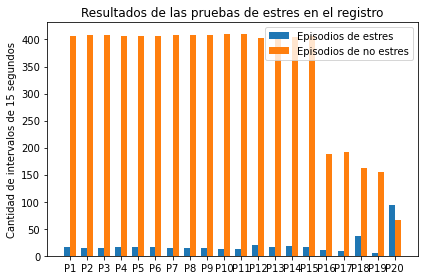

In [57]:
labels = ['P1','P2','P3', 'P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20'];
estres=[estres_pacientes[0],estres_pacientes[1],estres_pacientes[2],estres_pacientes[3],estres_pacientes[4],estres_pacientes[5],estres_pacientes[6],estres_pacientes[7],estres_pacientes[8],estres_pacientes[9],estres_pacientes[10],estres_pacientes[11],estres_pacientes[12],estres_pacientes[13],estres_pacientes[14],estres_pacientes[15],estres_pacientes[16],estres_pacientes[17],estres_pacientes[18],estres_pacientes[19] ]
noestres=[noestrespacientes[0],noestrespacientes[1],noestrespacientes[2],noestrespacientes[3],noestrespacientes[4],noestrespacientes[5],noestrespacientes[6],noestrespacientes[7],noestrespacientes[8],noestrespacientes[9],noestrespacientes[10],noestrespacientes[11],noestrespacientes[12],noestrespacientes[13],noestrespacientes[14],noestrespacientes[15],noestrespacientes[16],noestrespacientes[17],noestrespacientes[18],noestrespacientes[19]]                   

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, estres, width, label='Episodios de estres')
rects2 = ax.bar(x + width/2, noestres, width, label='Episodios de no estres')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad de intervalos de 15 segundos')
ax.set_title('Resultados de las pruebas de estres en el registro')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

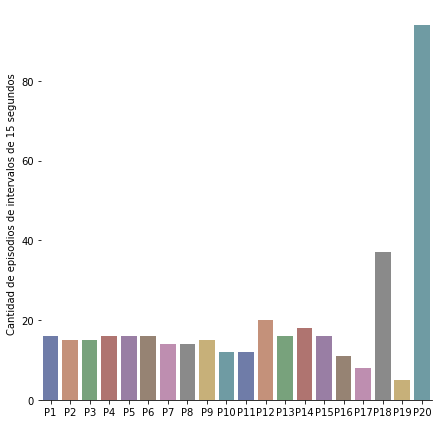

In [56]:
"""
Con la libreria Seaborn
"""

data = {'rango':['P1','P2','P3', 'P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P17','P18','P19','P20'],
        'Estrés':[estres_pacientes[0],estres_pacientes[1],estres_pacientes[2],estres_pacientes[3],estres_pacientes[4],estres_pacientes[5],estres_pacientes[6],estres_pacientes[7],estres_pacientes[8],estres_pacientes[9],estres_pacientes[10],estres_pacientes[11],estres_pacientes[12],estres_pacientes[13],estres_pacientes[14],estres_pacientes[15],estres_pacientes[16],estres_pacientes[17],estres_pacientes[18],estres_pacientes[19] ],
        'no Estrés':[noestrespacientes[0],noestrespacientes[1],noestrespacientes[2],noestrespacientes[3],noestrespacientes[4],noestrespacientes[5],noestrespacientes[6],noestrespacientes[7],noestrespacientes[8],noestrespacientes[9],noestrespacientes[10],noestrespacientes[11],noestrespacientes[12],noestrespacientes[13],noestrespacientes[14],noestrespacientes[15],noestrespacientes[16],noestrespacientes[17],noestrespacientes[18],noestrespacientes[19]],
        }
df = pd.DataFrame(data)
df

g = sns.catplot(
    data=df , kind="bar",
    x="rango", y="Estrés",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Cantidad de episodios de intervalos de 15 segundos")
g.set_titles("Internet a traves de los años")